In [91]:
#Distance between galaxies using scipy.integrate

import numpy as np
import scipy.integrate as integrate
from scipy.constants import c

H0 = 100.
Om, Or, Od, Ok = 0.275, 0., 0.725, 0.

def Ez(z_):
    a = 1./(1.+z_)
    E = np.sqrt(Om/a**3. + Or/a**4. + Od + Ok/a**2.)
    return E

chif = lambda z: 1./Ez(z)

def comodis(z): #comoving distance
    return integrate.quad(chif, 0., z)

def d_prime(z1, z2): #Eqn (3)
    chiz1 = comodis(z1)
    chiz2 = comodis(z2)
    chimul = chiz1[0] * chiz2[0]
    d_z = abs(chiz1[0] - chiz2[0])
    d_alpha = 2.* np.sin(alpha/2.) * np.sqrt(chimul) * (1. + 1./6 * Ok * chimul)
    d = np.sqrt(d_alpha**2. + d_z**2.)
    dprime = c/H0 * d
    darr = [d_alpha, d_z, d]
    return darr, dprime

z1, z2 = 0.41, 0.44
alpha = np.pi/30.

print d_prime(z1, z2)

([0.04030507745414585, 0.024327327797838083, 0.047077788248474056], 141135.65856213553)


In [92]:
#Distance between galaxies using simpson's rule for numerical integration.

import numpy as np
import scipy.integrate as integrate
from scipy.constants import c

H0 = 100.
Om, Or, Od, Ok = 0.275, 0., 0.725, 0.

def Ez(z_):
    a = 1./(1.+z_)
    E = np.sqrt(Om/a**3. + Or/a**4. + Od + Ok/a**2.)
    return E

def comodis(z): #comoving distance
    n = 1000
    a = np.zeros(n+1)
    h = z/float(n)
    a[0] = 1.
    f1, f2 = 0., 0.
    for i in range(1, n+1):
        a[i] = float(i) * h
    for i in range(1, n/2):
        z1 = a[2*i]
        f1 = f1 + 1./Ez(z1)
    for i in range(1, n/2+1):
        z1 = a[2*i-1]
        f2 = f2 + 1./Ez(z2)
    f3 = 1./Ez(z)
    integral = h/3. * (a[0] + 2.*f1 + 4.*f2 + f3)
    return integral

def d_prime(z1, z2): #Eqn (3)
    chiz1 = comodis(z1)
    chiz2 = comodis(z2)
    chimul = chiz1 * chiz2
    d_z = abs(chiz1 - chiz2)
    d_alpha = 2.* np.sin(alpha/2.) * np.sqrt(chimul) * (1. + 1./6 * Ok * chimul)
    d = np.sqrt(d_alpha**2. + d_z**2.)
    dprime = c/H0 * d
    darr = [d_alpha, d_z, d]
    return darr, dprime

z1, z2 = 0.41, 0.44
alpha = np.pi/30.

print d_prime(z1, z2)

([0.03727100828663128, 0.024193506876216242, 0.04443482681041595], 133212.25950298898)


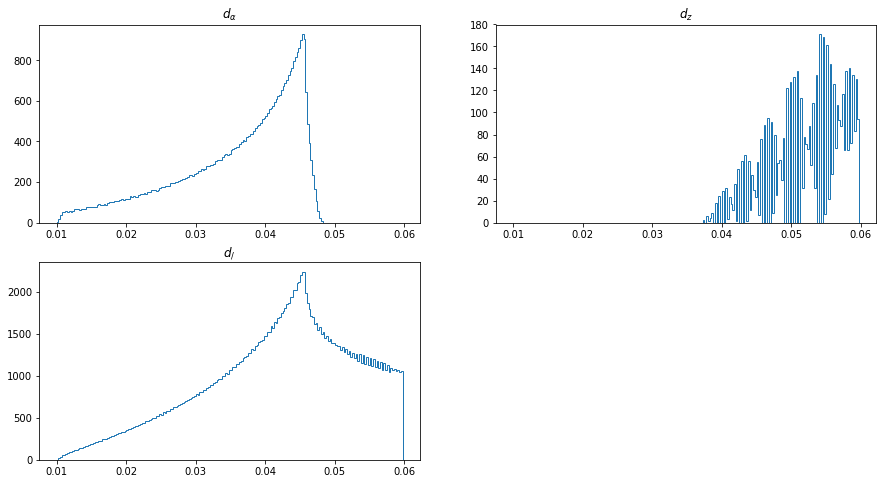

In [81]:
#Distance between galaxies using approximations in paper

import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.constants import c

H0 = 100.
z_c = 3.79
Om, Or, Od, Ok = 0.275, 0., 0.725, 0.

def Ez(z_):
    E = (1. - z/z_c) * np.exp(-z/z_c)
    return 1./E

def comodis(z): #comoving distance
    return z*np.exp(-z/z_c)

def d_calc(z1, z2, alpha): #Eqn (3)
    chiz1 = comodis(z1)
    chiz2 = comodis(z2)
    chimul = chiz1 * chiz2
    d_z = abs(chiz1 - chiz2)
    d_alpha = 2.* np.sin(alpha/2.) * np.sqrt(chimul) * (1. + 1./6 * Ok * chimul)
    d = np.sqrt(d_alpha**2. + d_z**2.)
    dprime = c/H0 * d
    darr = [d_alpha, d_z, d]
    return (darr, dprime)

#Binning of "d"
binspace = 0.00025
dbins = np.arange(0.01, 0.06, binspace)
#dhist1, dhist2, dhist3 = {}, {}, {}
dhist11, dhist22, dhist33 = [], [], []
'''
for i in range(len(dbins)):
    dhist1[dbins[i]+binspace/2.] = 0
    dhist2[dbins[i]+binspace/2.] = 0
    dhist3[dbins[i]+binspace/2.] = 0
'''

def d_hist(z1, z2, alpha):
    dval = d_calc(z1, z2, alpha)
    if (dval[0][1]/dval[0][0] < 1./3):
        dhist11.append(dval[0][2])
        '''
        for i in range(len(dbins)-1):
            if (dbins[i] <= dval[0][2] < dbins[i+1]):
                dhist1[dbins[i]+binspace/2.] += 1
                continue
        '''
    if (dval[0][0]/dval[0][1] < 1./3):
        dhist22.append(dval[0][2])
    else:
        dhist33.append(dval[0][2])

zarr = np.linspace(0.1, 0.7, 1000)
alphaarr = np.linspace(np.pi/30., np.pi/40., 1000)
for i in range(len(zarr)):
    for j in range(len(zarr)):
        if (i == j): continue
        z1, z2 = zarr[i], zarr[j]
        alpha = alphaarr[i]
        d_hist(z1, z2, alpha)

fig = plt.figure(figsize = [15, 8])
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax1.hist(dhist11, dbins, histtype='step')
ax1.set_title(r'$d_\alpha$')
ax2.hist(dhist22, dbins, histtype='step')
ax2.set_title(r'$d_z$')
ax3.hist(dhist33, dbins, histtype='step')
ax3.set_title(r'$d_/$')
fig.show()